In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating database connections
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1301690.60,25.51,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,958016.32,19.88,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1000906.78,22.06,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,978278.77,21.86,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,992581.73,23.50,0.98,1.40


In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990,28.9900,7499.99
Volume,10692.0,847.360550,664.309212,50.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.0000,261.000,1929.2500,334939.00
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.2200,5298.045,28396.9150,5101919.51
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.7100,2857.800,16059.5625,672819.31


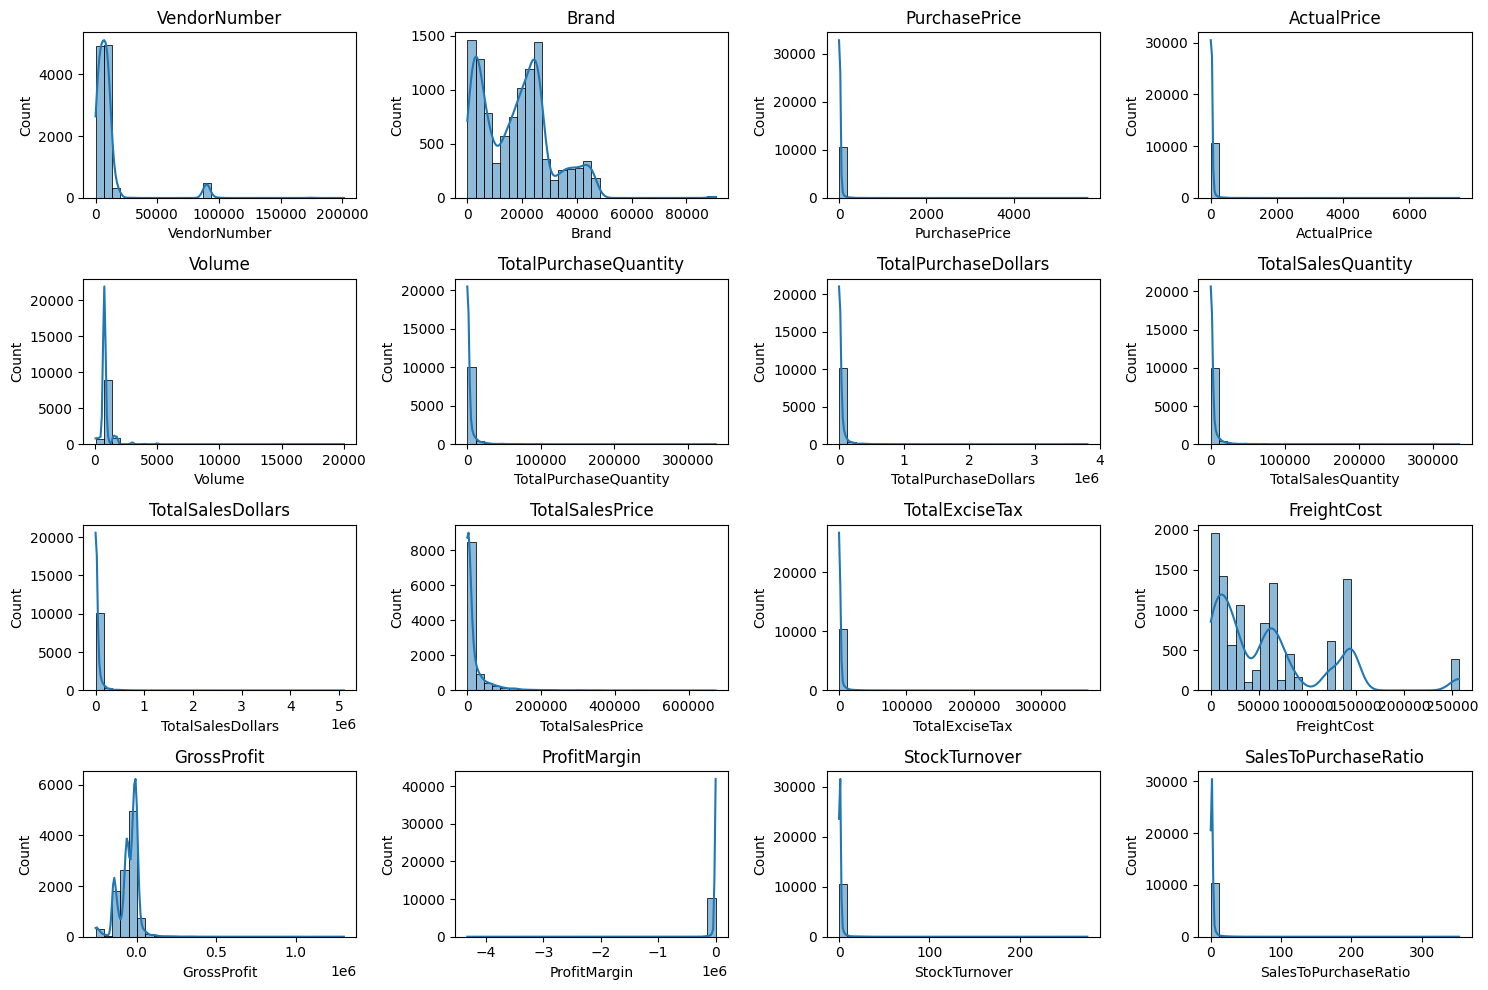

In [4]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

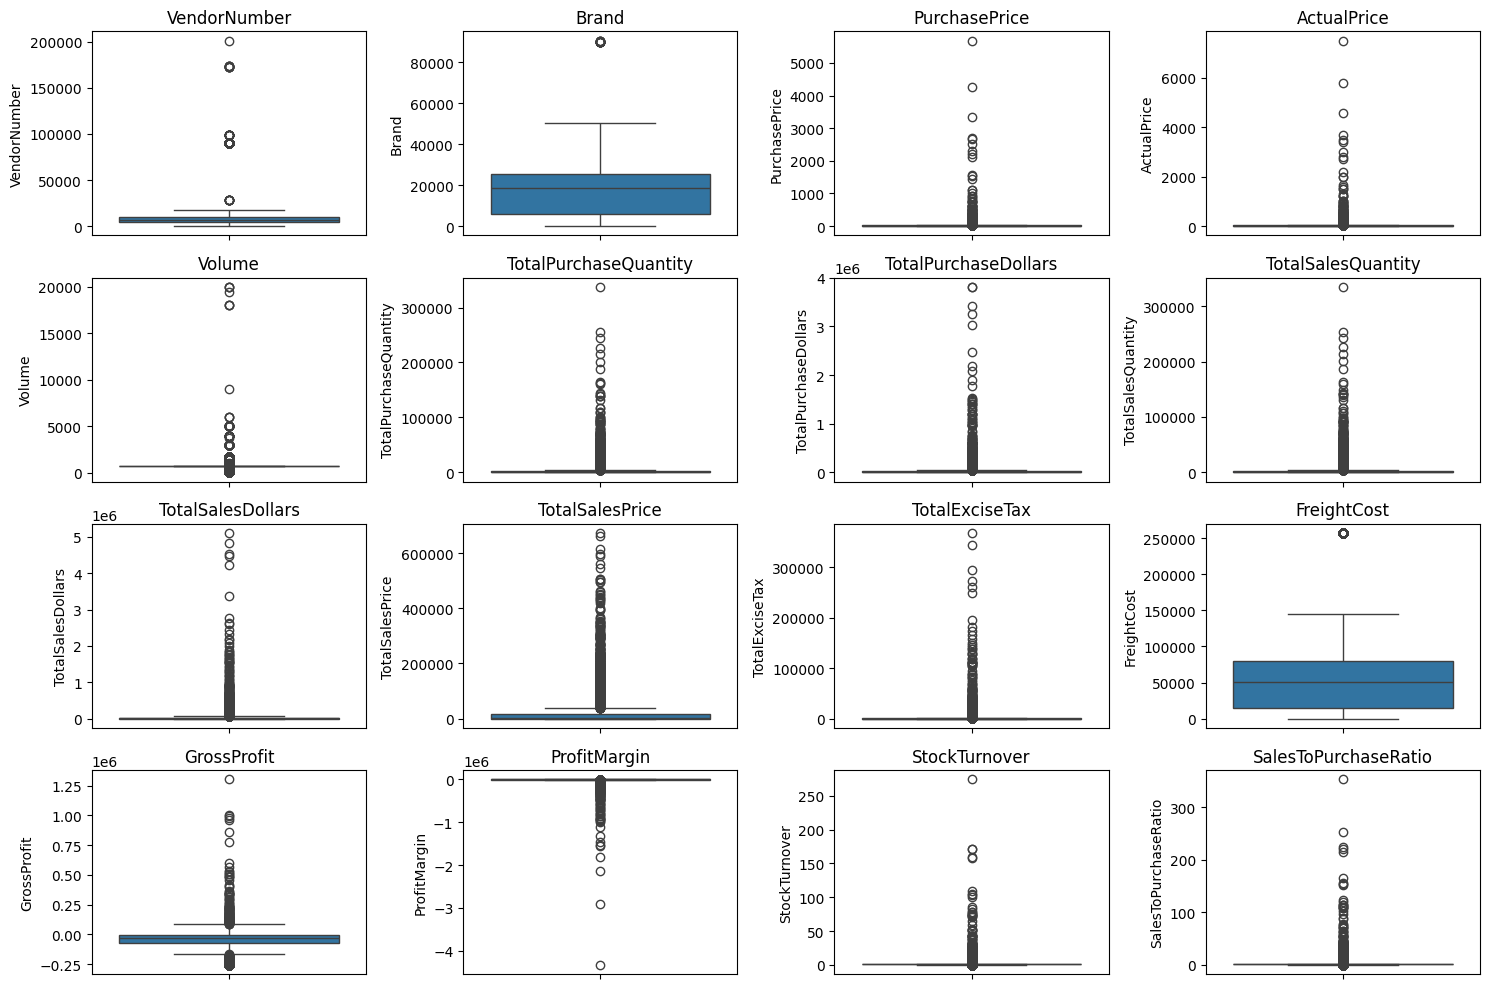

In [5]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
pd.read_sql_query("PRAGMA table_info(vendor_sales_summary)", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,VendorNumber,INTEGER,0,None,0
1,1,VendorName,TEXT,0,None,0
2,2,Brand,INTEGER,0,None,0
3,3,Description,TEXT,0,None,0
4,4,PurchasePrice,REAL,0,None,0
5,5,ActualPrice,REAL,0,None,0
6,6,Volume,REAL,0,None,0
7,7,TotalPurchaseQuantity,INTEGER,0,None,0
8,8,TotalPurchaseDollars,REAL,0,None,0
9,9,TotalSalesQuantity,REAL,0,None,0


In [7]:
# Calculate GrossProfit
cursor.execute("""
UPDATE vendor_sales_summary
SET GrossProfit = TotalSalesDollars - (TotalSalesQuantity * PurchasePrice + FreightCost)
""")

# Calculate ProfitMargin (as a percentage)
cursor.execute("""
UPDATE vendor_sales_summary
SET ProfitMargin = ROUND(
    (TotalSalesDollars - (TotalSalesQuantity * PurchasePrice + FreightCost)) * 100.0 
    / TotalSalesDollars, 2
)
""")

# Calculate StockTurnover (assuming it's: TotalSalesQuantity / TotalPurchaseQuantity)
cursor.execute("""
UPDATE vendor_sales_summary
SET StockTurnover = 
    CASE WHEN TotalPurchaseQuantity > 0 THEN 
        ROUND(TotalSalesQuantity * 1.0 / TotalPurchaseQuantity, 2)
    ELSE NULL
    END
""")

# Calculate SalesToPurchaseRatio (TotalSalesDollars / TotalPurchaseDollars)
cursor.execute("""
UPDATE vendor_sales_summary
SET SalesToPurchaseRatio = 
    CASE WHEN TotalPurchaseDollars > 0 THEN 
        ROUND(TotalSalesDollars / TotalPurchaseDollars, 2)
    ELSE NULL
    END
""")

conn.commit()


NameError: name 'cursor' is not defined

In [8]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1301690.60,25.51,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,958016.32,19.88,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1000906.78,22.06,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,978278.77,21.86,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,992581.73,23.50,0.98,1.40


In [9]:
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1301690.60,25.51,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,958016.32,19.88,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1000906.78,22.06,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,978278.77,21.86,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,992581.73,23.50,0.98,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,5612,MILTONS DISTRIBUTING CO,17887,Trader Joe's Chard 720 Btls,2.56,3.79,750.0,12,30.72,12.0,45.48,3.79,1.35,9.46,5.30,11.65,1.00,1.48
1413,8663,STAR INDUSTRIES INC.,3991,Georgi Watermelon Vodka,7.87,9.99,1000.0,3,23.61,10.0,99.90,59.94,10.50,12.44,8.76,8.77,3.33,4.23
1414,7749,R.P.IMPORTS INC,19612,Ch Petit Bocq Cru Borgeos 10,21.19,31.99,750.0,1,21.19,10.0,319.90,191.94,1.11,91.50,16.50,5.16,10.00,15.10
1415,201359,FLAVOR ESSENCE INC,90609,Flavor Essence Variety 5 Pak,17.00,24.99,162.5,1,17.00,59.0,1474.41,1324.47,1.24,0.09,471.32,31.97,59.00,86.73


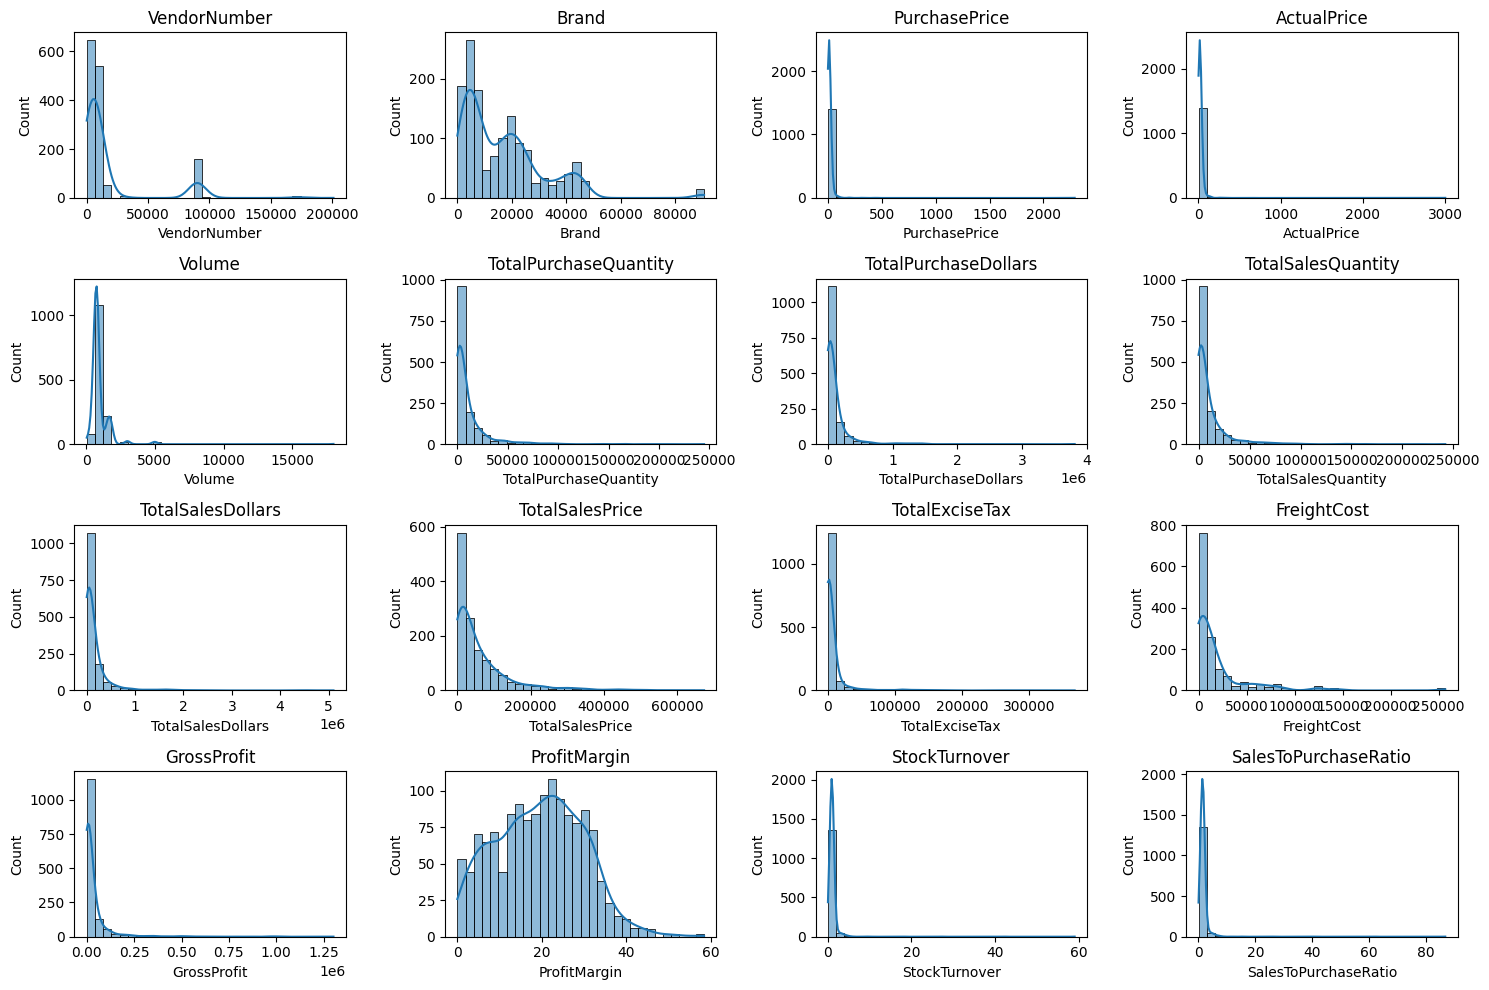

In [11]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

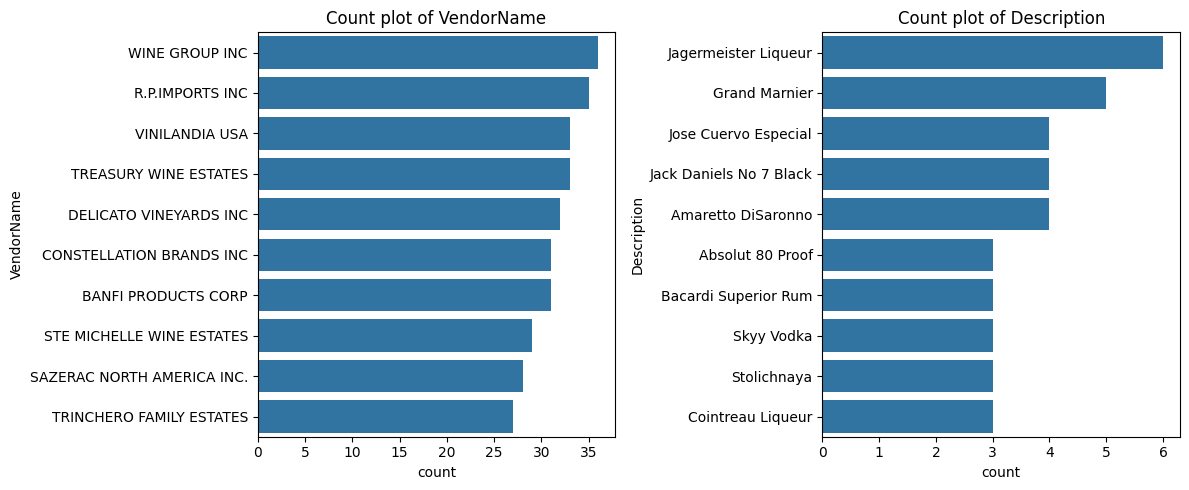

In [12]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1) 
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

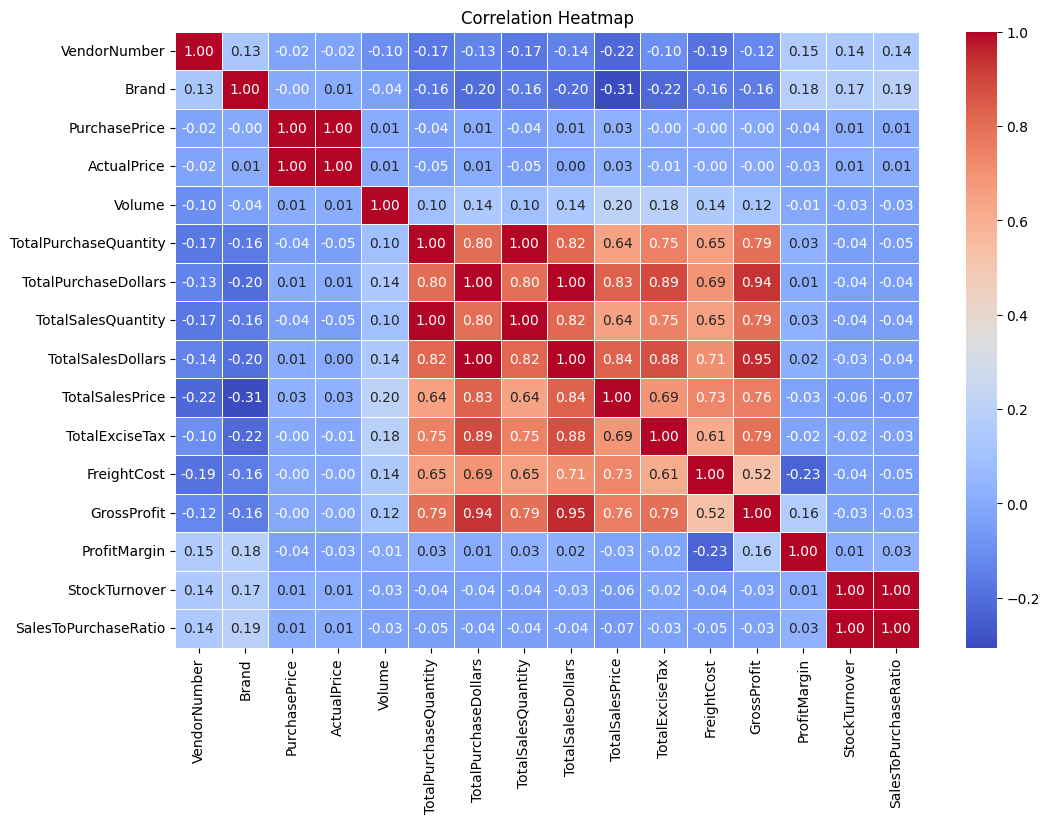

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

DATA ANALYSIS

Identify Brands that needs promotional or pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [14]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [15]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

np.float64(3959.76)

In [17]:
high_margin_threshold 

np.float64(30.59)

In [18]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
769,Laurent Reverdy Sancerre,323.76,32.59
37,Alta Classe Mntplcno Abruzzo,327.59,32.73
57,Apimed Trnava Mead,335.70,30.74
1069,Silver Mtn Hard Cider,342.51,34.94
1192,The Pass Svgn Bl,431.52,33.29
56,Apimed Slovak Mead,464.58,31.38
932,Pacifico Sur Chard Curico,503.01,45.68
373,Crane Lake Pnt Grigio Cal,539.40,31.86
55,Apimed Old Slavic Mead Light,635.40,34.14
930,Pacifico Sur Cab Svgn Curico,646.60,38.91


In [19]:
brand_performance = brand_performance [brand_performance['TotalSalesDollars']<10000]

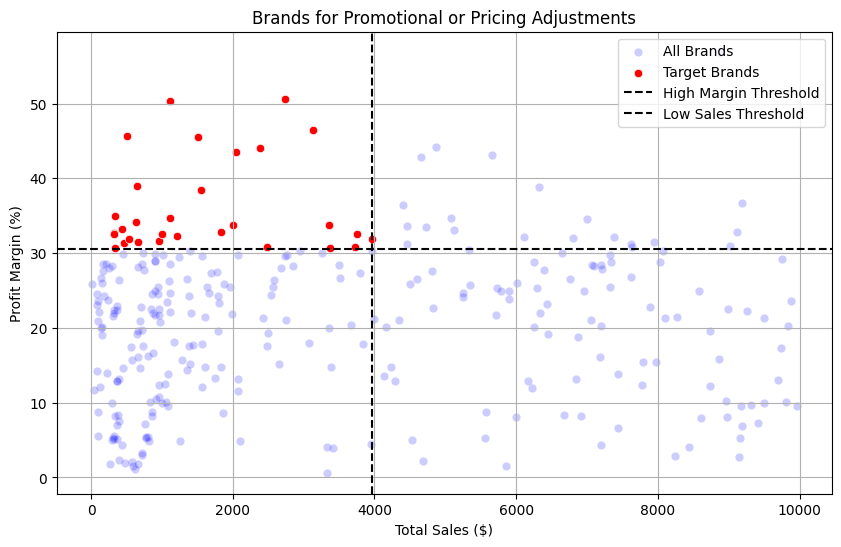

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

which vendor and brands demonstrate the highest sales performance ?

In [21]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [22]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC    26668483.73
PERNOD RICARD USA           19270122.38
BACARDI USA INC             16430939.31
BROWN-FORMAN CORP           13973438.60
MARTIGNETTI COMPANIES       13568167.45
CONSTELLATION BRANDS INC    13025275.88
JIM BEAM BRANDS COMPANY     10086922.74
MOET HENNESSY USA INC       10076794.23
SAZERAC CO INC               8821650.76
PROXIMO SPIRITS INC.         7828535.38
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands

Description
Jack Daniels No 7 Black    7730401.48
Tito's Handmade Vodka      7016605.45
Grey Goose Vodka           6820192.82
Absolut 80 Proof           5923018.88
Jameson Irish Whiskey      4922333.26
Capt Morgan Spiced Rum     4475972.88
Ketel One Vodka            4223107.62
Baileys Irish Cream        3524265.94
Kahlua                     3240698.40
Bacardi Superior Rum       2823593.54
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.73M
Tito's Handmade Vodka      7.02M
Grey Goose Vodka           6.82M
Absolut 80 Proof           5.92M
Jameson Irish Whiskey      4.92M
Capt Morgan Spiced Rum     4.48M
Ketel One Vodka            4.22M
Baileys Irish Cream        3.52M
Kahlua                     3.24M
Bacardi Superior Rum       2.82M
Name: TotalSalesDollars, dtype: object

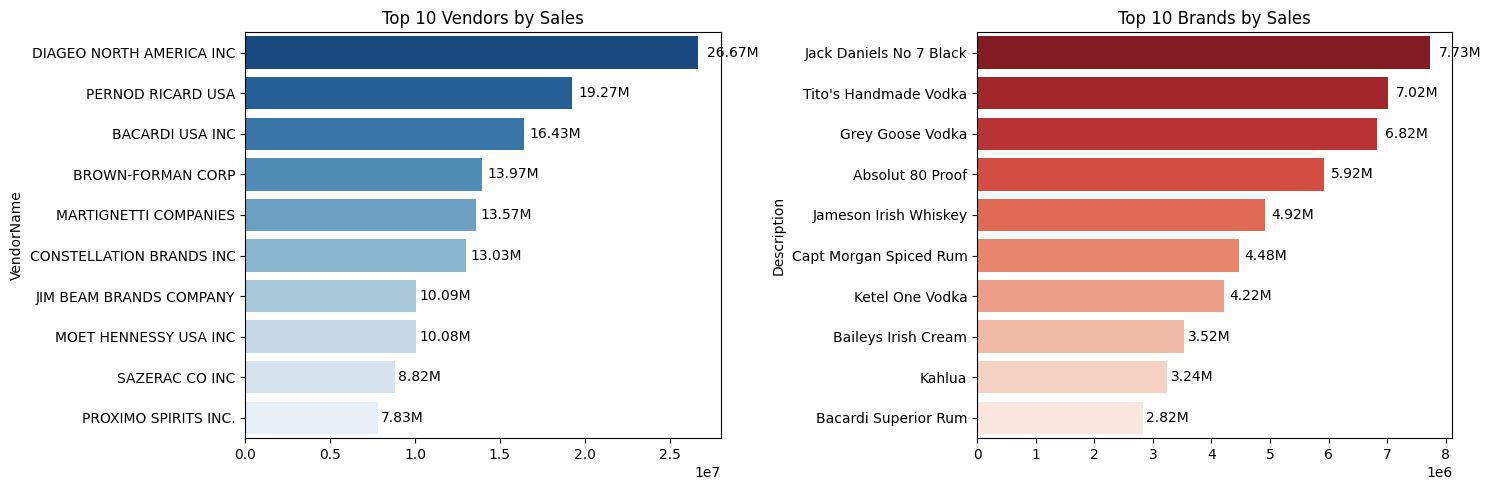

In [25]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

which vendor contribute the most to total purchase dollars?

In [26]:
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": 'sum',
    "GrossProfit": 'sum',
    "TotalSalesDollars": 'sum'
}).reset_index()
vendor_performance.shape

(124, 4)

In [27]:
vendor_performance["PurchaseContribution%"] = vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()*100

In [28]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [29]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
27,DIAGEO NORTH AMERICA INC,19.70M,4.20M,26.67M,11.16
72,PERNOD RICARD USA,14.60M,3.19M,19.27M,8.27
7,BACARDI USA INC,11.65M,3.50M,16.43M,6.60
13,BROWN-FORMAN CORP,10.13M,2.71M,13.97M,5.74
61,MARTIGNETTI COMPANIES,9.33M,2.45M,13.57M,5.28
22,CONSTELLATION BRANDS INC,8.18M,2.50M,13.03M,4.63
49,JIM BEAM BRANDS COMPANY,7.59M,1.59M,10.09M,4.30
65,MOET HENNESSY USA INC,7.02M,2.33M,10.08M,3.98
83,SAZERAC CO INC,6.59M,1.26M,8.82M,3.74
78,PROXIMO SPIRITS INC.,5.59M,1.46M,7.83M,3.17


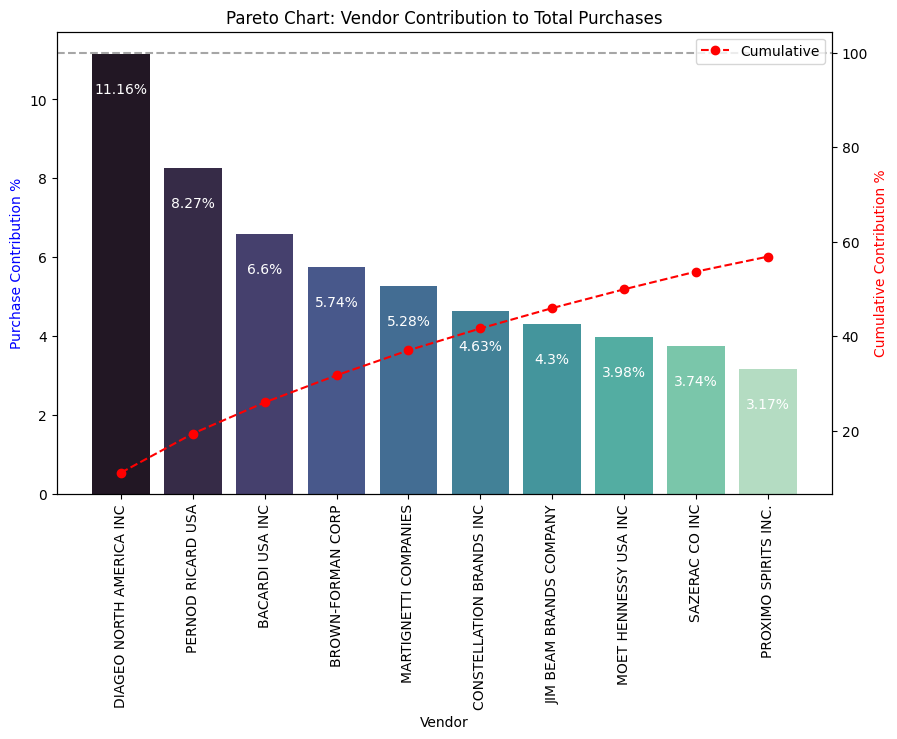

In [30]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for puchase Contributions%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='--', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendor')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [32]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 56.87%


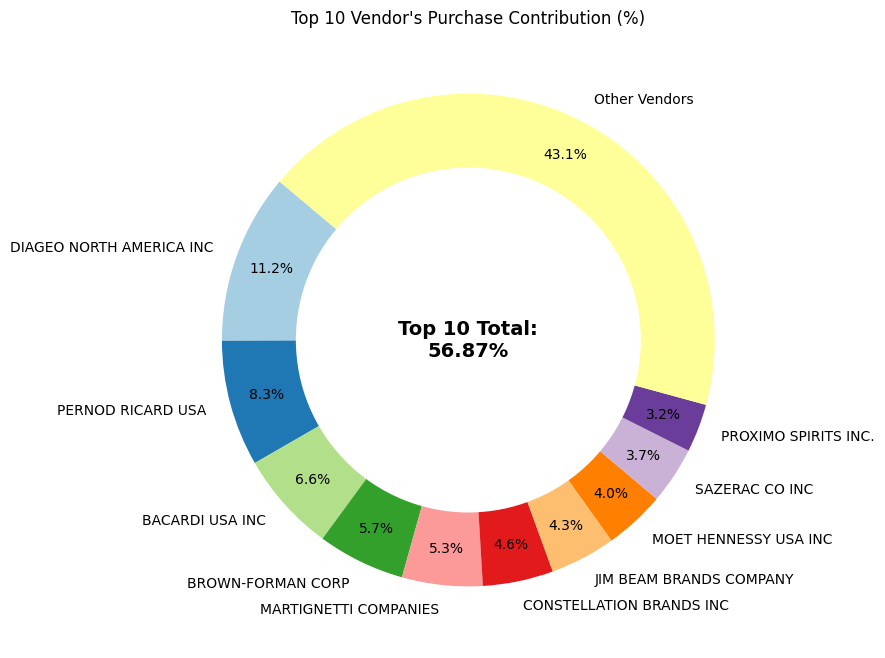

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va="center")

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal puchase volume for cost savings ?

In [35]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [37]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [41]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,26.211038
Medium,12.904936
Large,10.784778


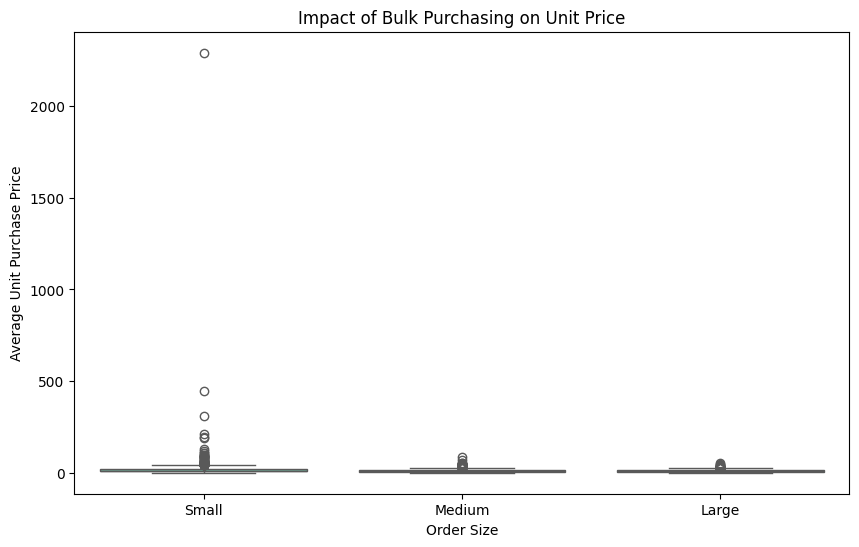

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

now... Which vendor have low inventory turnover, indicating excess stock and slow- moving products 

In [47]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
TRUETT HURST,0.040000
"IRA GOLDMAN AND WILLIAMS, LLP",0.070000
UNCORKED,0.216000
Serralles Usa LLC,0.290000
LOYAL DOG WINERY,0.310000
BLACK COVE BEVERAGES,0.340000
Russian Standard Vodka,0.380000
HIGHLAND WINE MERCHANTS LLC,0.436667
GILMANTON WINERY & VINEYARD,0.470000


In [48]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 3.58M


In [49]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
121,WILLIAM GRANT & SONS INC,389.81K
49,JIM BEAM BRANDS COMPANY,332.94K
27,DIAGEO NORTH AMERICA INC,318.60K
72,PERNOD RICARD USA,251.52K
65,MOET HENNESSY USA INC,192.51K
13,BROWN-FORMAN CORP,166.94K
83,SAZERAC CO INC,143.93K
81,REMY COINTREAU USA INC,124.35K
22,CONSTELLATION BRANDS INC,115.65K
58,MAJESTIC FINE WINES,113.06K


In [50]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [51]:
top_vendors

0      25.51
1      19.88
2      22.06
3      21.86
4      23.50
       ...  
374    30.60
376     5.99
377    31.40
405     2.11
445    37.70
Name: ProfitMargin, Length: 355, dtype: float64

In [52]:
low_vendors

868      5.23
914     13.19
935     17.34
959     15.61
962     15.49
        ...  
1412    11.65
1413     8.77
1414     5.16
1415    31.97
1416     6.99
Name: ProfitMargin, Length: 355, dtype: float64

In [53]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (18.59, 20.60), Mean: 19.59
Low Vendors 95% CI: (19.82, 22.01), Mean: 20.91


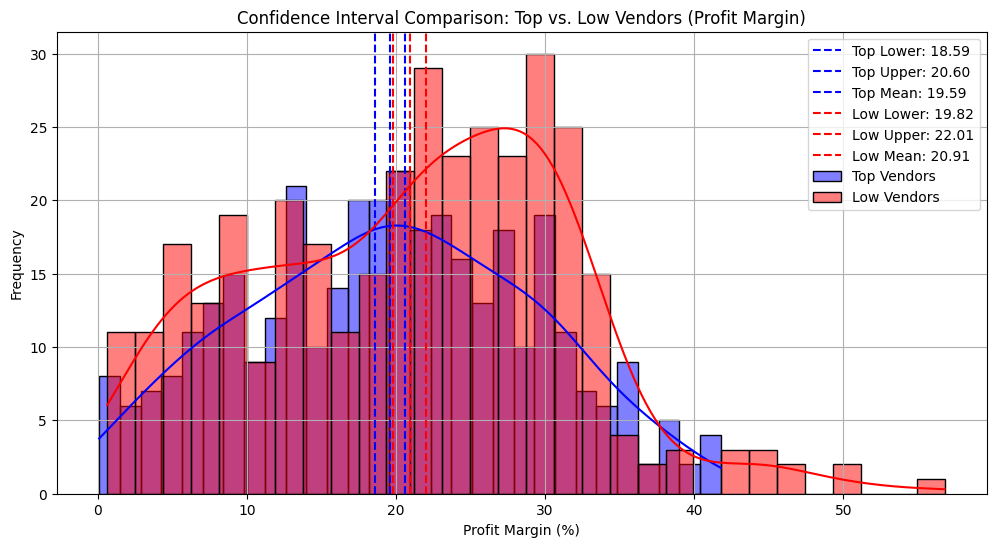

In [55]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# H0 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -1.7453, P-Value: 0.0814
Fail to Reject H0: No significant difference in profit margins.
